# Data Analysis: Wine Reviews

Goal: Predict the price of a bottle of wine based on attributes such as: where it is from, what type of wine, and the description.

Data source is from Kaggle: https://www.kaggle.com/zynicide/wine-reviews/data

Subgoals:
1. Regression: Predict a wine's price only using the text in the `description` column.
2. Classification: Predict whether a wine costs more than 42 dollars only using the `description` column.

3. Regression: Predict a wine's price using any column _except_ for the `description` column.
4. Classification: Predict whether a wine costs more than 42 dollars using any column _except_ for the `description` column.

## Clean and Explore data

### Import data

In [1]:
import pandas as pd
import numpy as np

In [2]:
wines_csv = 'winemag-data-130k-v2.csv'

In [3]:
wines = pd.read_csv(wines_csv)

In [4]:
wines.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [5]:
wines.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


Notes: Looking through the csv file, it looks like: 
- `Unnamed` is just an ID. 
- `twitter_handle` seems to be a subset of `taster_name`. 
- The `title`s of a wine tends for follow a general format of: `winery` + year + `designation` + `variety` + (`region` or `province`). So most of it seems to capture repeat information, except for the year. We could likely extract the year and discard the rest of the title without losing too much information.
- `region_1` seems more specific than `region_2`, because wines with the same `region_2` may have the same `region_1`, but according to the data dictionary on Kaggle, supposedly `region_2` should be more specific than `region_1`.
- It appears that all of these wines have a `points` score of at least 80.

In terms of price, it seems that the average price is 35 dollars. The cheapest wine is 4 dollars. The most expensive wine is 3,300 dollars (and it is, somewhat unsurprisingly, from France).

In [4]:
value_wines = wines['description'].str.contains('value')

In [7]:
wines[value_wines]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
21,21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat
156,156,Germany,Approachably fruity yet nuanced and electrifyi...,Graacher Himmelreich Spätlese,91,14.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Carl Graff 2014 Graacher Himmelreich Spätlese ...,Riesling,Carl Graff
188,188,Chile,Bisquertt usually does well with its value-pri...,Casa La Joya Reserve,88,11.0,Colchagua Valley,NaN,NaN,Michael Schachner,@wineschach,Viña Bisquertt 2007 Casa La Joya Reserve Merlo...,Merlot,Viña Bisquertt
189,189,Chile,"Clean and honest up front, with moderate richn...",Natura,87,11.0,Casablanca Valley,NaN,NaN,Michael Schachner,@wineschach,Emiliana 2008 Natura Chardonnay (Casablanca Va...,Chardonnay,Emiliana
256,256,South Africa,"A good value, this is an easy-pleasing Syrah w...",Goat-Roti,89,20.0,Coastal Region,NaN,NaN,Lauren Buzzeo,@laurbuzz,Goats do Roam Wine Co. 2008 Goat-Roti Syrah-Vi...,Syrah-Viognier,Goats do Roam Wine Co.
392,392,US,"A lovely wine, made even more attractive by th...",NaN,87,12.0,California,Santa Ynez Valley,Central Coast,NaN,NaN,Bridlewood 2000 Sauvignon Blanc (Santa Ynez Va...,Sauvignon Blanc,Bridlewood
670,670,US,"Dark berry, herb and fig aromas lead to dense,...",Eco Made with Organic Grapes,90,13.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Snoqualmie 2013 Eco Made with Organic Grapes C...,Cabernet Sauvignon,Snoqualmie
768,768,Australia,"A good value in easy-to-drink Cabernet, McWill...",NaN,87,11.0,Australia Other,South Eastern Australia,NaN,Joe Czerwinski,@JoeCz,McWilliam's Hanwood Estate 2008 Cabernet Sauvi...,Cabernet Sauvignon,McWilliam's Hanwood Estate
1008,1008,Australia,"Intense and focused, this good value Coonawarr...",NaN,88,14.0,South Australia,Coonawarra,NaN,NaN,NaN,Nick Faldo 2005 Shiraz (Coonawarra),Shiraz,Nick Faldo


In [8]:
wines[value_wines].describe()

,Unnamed: 0,points,price
count,1138.000000,1138.000000,1129.000000
mean,63278.936731,88.146749,17.807795
std,37878.221087,2.447782,11.610603
min,10.000000,80.000000,5.000000
25%,30050.500000,86.000000,11.000000
50%,63049.000000,88.000000,15.000000
75%,96779.500000,90.000000,20.000000
max,129903.000000,97.000000,195.000000


I noticed that some of the descriptions of wines contained the word 'value,' as in, "This wine is a good value." I'm curious of this can be indicative of a cheaper price point. Manually looking through, sometimes there are false cases where value refers to the winery's values, rather than a good price for the wine. This potentially could be useful, so let's add it as a column to our dataframe.

In [5]:
wines['contains_word_value'] = value_wines

In [10]:
list(wines)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery',
 'contains_word_value']

### Extract if price > 42 or not

Since one of our goals is to predict if a wine costs more than 42, we can add a column for that as well.

In [6]:
wines['price_over_42'] = np.where(wines['price'] > 42, 1, 0)

In [12]:
wines.head() # Double check the selection worked

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,contains_word_value,price_over_42
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,False,0
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,False,0
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,False,0
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,False,0
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,False,1


### Extract year

Next, let's extract the year from the title and add it as a column to the dataset. (Q1) It appears that the years in the title column are consistently 4 digit numbers, e.g. `19**` or `20**`. Not too bad -- all we'd have to do is extract the 4 digits from the title column in each row.

I used https://regex101.com/ to test out this regex on a random sampling of `title` columns and it seems to do the job: `\d{4}`. Four consecutive digits.

In [7]:
wines['year'] = wines['title'].str.extract('(\d{4})')

/Users/nancywong/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [14]:
wines.head() # Check if it worked

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,contains_word_value,price_over_42,year
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,False,0,2013
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,False,0,2011
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,False,0,2013
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,False,0,2013
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,False,1,2012


### Categorical Variables

In [15]:
wines.groupby(['country']).size()

country
Argentina                  3800
Armenia                       2
Australia                  2329
Austria                    3345
Bosnia and Herzegovina        2
Brazil                       52
Bulgaria                    141
Canada                      257
Chile                      4472
China                         1
Croatia                      73
Cyprus                       11
Czech Republic               12
Egypt                         1
England                      74
France                    22093
Georgia                      86
Germany                    2165
Greece                      466
Hungary                     146
India                         9
Israel                      505
Italy                     19540
Lebanon                      35
Luxembourg                    6
Macedonia                    12
Mexico                       70
Moldova                      59
Morocco                      28
New Zealand                1419
Peru                         16


Ideally, I would have the time to convert categorical variables using one-hot encoding. However, it does take a lot of memory and time. An alternative would be to use label encoding, where we replace categories with integers, i.e. Argentina=1, Armenia=2, etc., but we risk creating a false ordering. Given more time, we could manually group some of these categories, e.g. by continent, to better make use of these columns.

In [16]:
wines.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
contains_word_value         bool
price_over_42              int64
year                      object
dtype: object

In [12]:
categorical_cols = ['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'variety', 'winery']

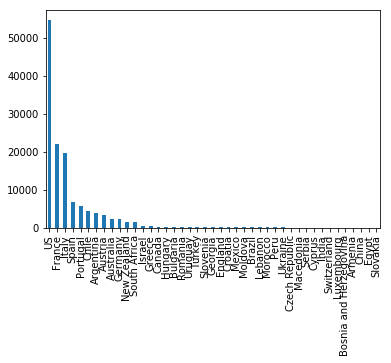

In [11]:
wines['country'].value_counts().plot(kind='bar')

In [19]:
wines['designation'].value_counts()

Reserve                                          2009
Estate                                           1322
Reserva                                          1259
Riserva                                           698
Estate Grown                                      621
Brut                                              513
Dry                                               413
Barrel sample                                     375
Crianza                                           343
Estate Bottled                                    342
Vieilles Vignes                                   308
Brut Rosé                                         276
Gran Reserva                                      261
Barrel Sample                                     252
Tradition                                         238
Old Vine                                          221
Extra Dry                                         204
Rosé of                                           172
Rosé                        

In [20]:
wines['province'].value_counts()

California                  36247
Washington                   8639
Bordeaux                     5941
Tuscany                      5897
Oregon                       5373
Burgundy                     3980
Northern Spain               3851
Piedmont                     3729
Mendoza Province             3264
Veneto                       2716
New York                     2688
Alsace                       2440
Northeastern Italy           2138
Loire Valley                 1856
Sicily & Sardinia            1797
Champagne                    1613
Southwest France             1503
Southern Italy               1349
South Australia              1349
Provence                     1346
Douro                        1281
Central Italy                1233
Catalonia                    1164
Rhône Valley                 1081
Beaujolais                   1044
Mosel                        1039
Alentejano                    937
Colchagua Valley              830
Marlborough                   798
Virginia      

In [21]:
wines['region_1'].value_counts()

Napa Valley                               4480
Columbia Valley (WA)                      4124
Russian River Valley                      3091
California                                2629
Paso Robles                               2350
Willamette Valley                         2301
Mendoza                                   2301
Alsace                                    2163
Champagne                                 1613
Barolo                                    1599
Finger Lakes                              1565
Sonoma Coast                              1474
Brunello di Montalcino                    1470
Rioja                                     1469
Sonoma County                             1246
Toscana                                   1197
Walla Walla Valley (WA)                   1066
Chianti Classico                          1062
Santa Barbara County                      1000
Carneros                                   999
Yakima Valley                              997
Sta. Rita Hil

In [22]:
wines['region_2'].value_counts()

Central Coast        11065
Sonoma                9028
Columbia Valley       8103
Napa                  6814
Willamette Valley     3423
California Other      2663
Finger Lakes          1777
Sierra Foothills      1462
Napa-Sonoma           1169
Central Valley        1062
Southern Oregon        917
Oregon Other           727
Long Island            680
North Coast            584
Washington Other       534
South Coast            272
New York Other         231
Name: region_2, dtype: int64

In [23]:
wines['variety'].value_counts()

Pinot Noir                        13272
Chardonnay                        11753
Cabernet Sauvignon                 9472
Red Blend                          8946
Bordeaux-style Red Blend           6915
Riesling                           5189
Sauvignon Blanc                    4967
Syrah                              4142
Rosé                               3564
Merlot                             3102
Nebbiolo                           2804
Zinfandel                          2714
Sangiovese                         2707
Malbec                             2652
Portuguese Red                     2466
White Blend                        2360
Sparkling Blend                    2153
Tempranillo                        1810
Rhône-style Red Blend              1471
Pinot Gris                         1455
Champagne Blend                    1396
Cabernet Franc                     1353
Grüner Veltliner                   1345
Portuguese White                   1159
Bordeaux-style White Blend         1066


In [24]:
wines['winery'].value_counts()

Wines & Winemakers            222
Testarossa                    218
DFJ Vinhos                    215
Williams Selyem               211
Louis Latour                  199
Georges Duboeuf               196
Chateau Ste. Michelle         194
Concha y Toro                 164
Columbia Crest                159
Kendall-Jackson               130
Siduri                        126
Gary Farrell                  125
Lynmar                        118
Albert Bichot                 117
Montes                        117
Trapiche                      113
Undurraga                     113
Casa Santos Lima              113
Jean-Luc and Paul Aegerter    113
Santa Ema                     112
Robert Mondavi                112
Chanson Père et Fils          109
Fess Parker                   108
V. Sattui                     107
Iron Horse                    106
Foxen                         105
Louis Jadot                   104
Feudi di San Gregorio         102
Chehalem                      102
Maryhill      

It looks like that, for a lot of these categorical variables, a large distribution falls on a few categories. There are many categories with only 1 wine that falls in that category.

For the sake of time, we can revisit label encoding as needed.

Given more time: One way to handle this is to add a mask such that we can only look at wines that fall under the first most common 50 categories in each column. e.g. There are 16,757 wineries. If we wanted to visualize the prices for the top 50 wineries, we could add a mask for the value_counts to be over 50, allowing us to see how price might correlate for each of these wineries. 

### Data visualization

Let's visualize some of the distributions of these values.

In [8]:
% matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
list(wines)

['Unnamed: 0',
 'country',
 'description',
 'designation',
 'points',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery',
 'contains_word_value',
 'price_over_42',
 'year']

In [9]:
# As noted earlier, these columns can be dropped.
drop_cols = ['Unnamed: 0', 'taster_twitter_handle'] 

In [10]:
wines = wines.drop(drop_cols, axis=1, inplace=False)

Let's try a preliminary pairplot, as it may give us hints on what to explore next.

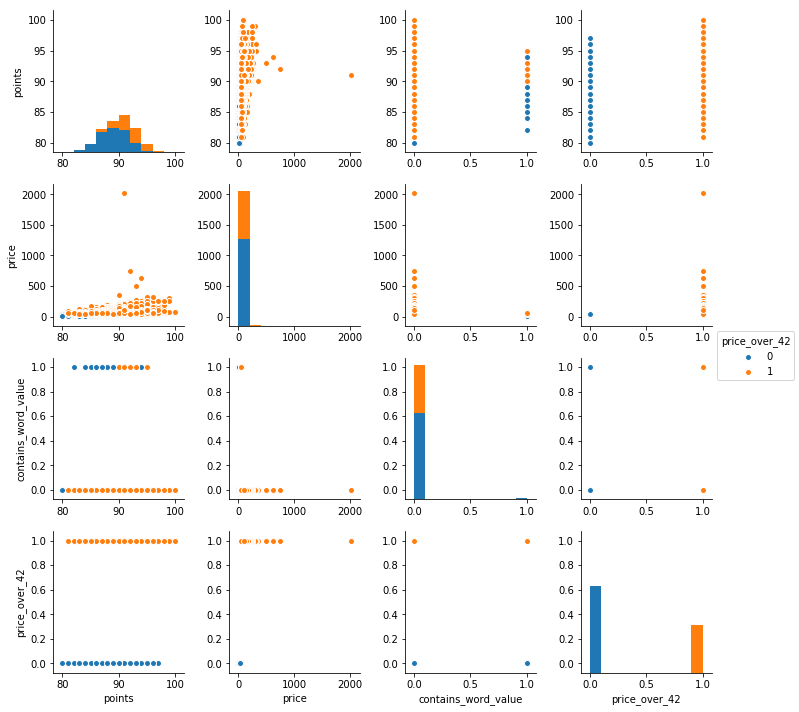

In [33]:
sns.pairplot(wines.dropna(), hue='price_over_42')

Looking just at these pairplots, it appears there are correlations between price and other variables. We might want to encode our categorical variables so that we can find more patterns and correlations.

In [44]:
wines.dtypes

country                 object
description             object
designation             object
points                   int64
price                  float64
province                object
region_1                object
region_2                object
taster_name             object
title                   object
variety                 object
winery                  object
contains_word_value       bool
price_over_42            int64
year                    object
dtype: object

### Categorical Variables x Price

In [13]:
categorical_cols

['country',
 'designation',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'variety',
 'winery']

In [14]:
# Convert to category dtypes
for col in categorical_cols:
    wines[col] = wines[col].astype('category')

In [27]:
wines.dtypes

country                category
description              object
designation            category
points                    int64
price                   float64
province               category
region_1               category
region_2               category
taster_name            category
title                    object
variety                category
winery                 category
contains_word_value        bool
price_over_42             int64
year                     object
dtype: object

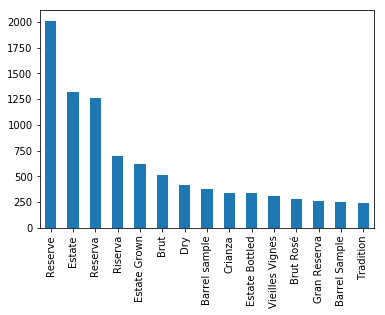

In [60]:
wines['designation'].value_counts().head(15).plot.bar()

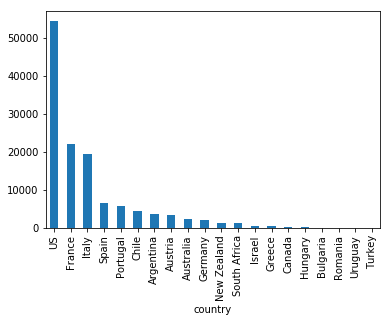

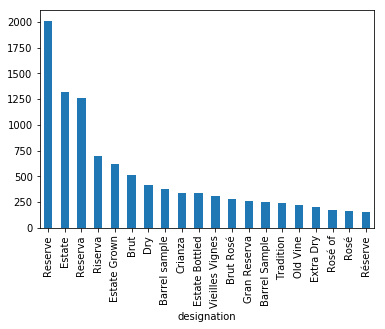

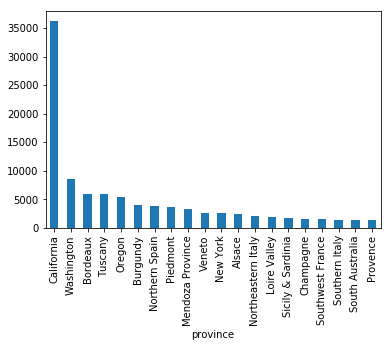

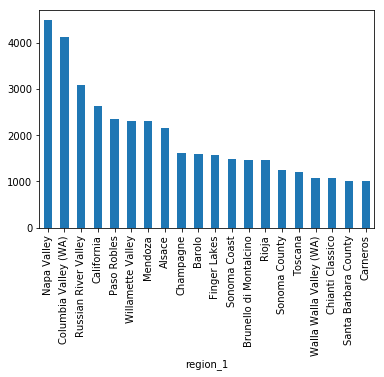

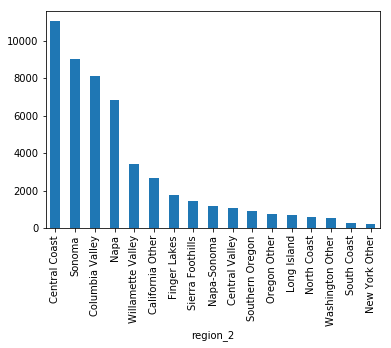

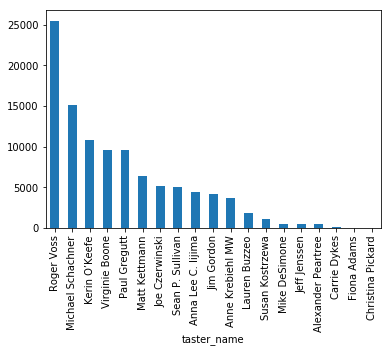

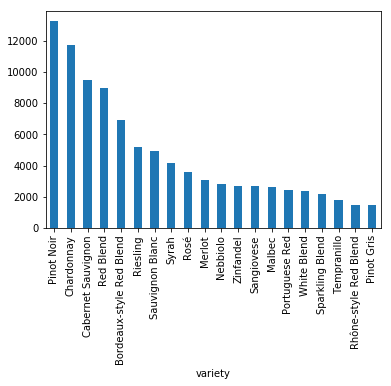

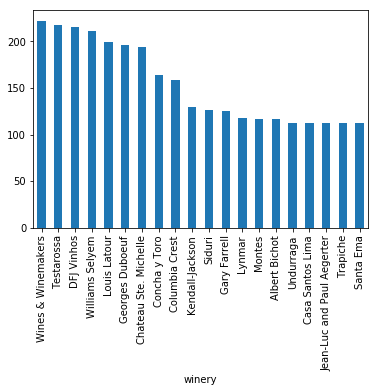

In [63]:
# Visualize distributions for top 20 categories in categorical columns
for col in categorical_cols:
    wines[col].value_counts().head(20).plot.bar()
    plt.xlabel(col)
    plt.show()

Lastly, I want to visualize the correlation matrix. Let's use label encoding for now for the sake of time, knowing there is the shortcoming that these categories aren't inherently ordered.

In [57]:
wines.dtypes

country                category
description              object
designation            category
points                    int64
price                   float64
province               category
region_1               category
region_2               category
taster_name            category
title                    object
variety                category
winery                 category
contains_word_value        bool
price_over_42             int64
year                     object
dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  -1.0],
 <a list of 44 Text xticklabel objects>)

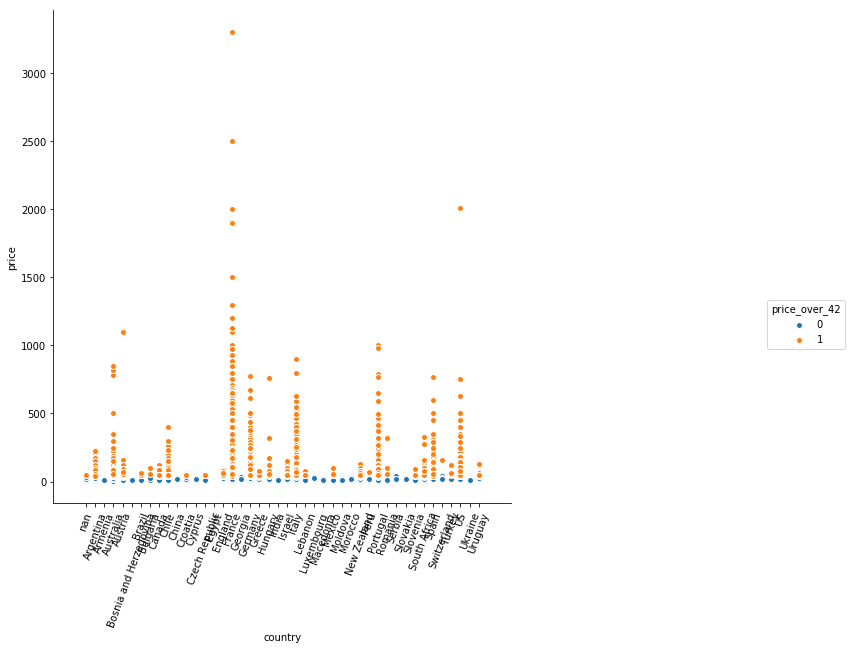

In [56]:
g = sns.pairplot(x_vars=['country'], y_vars=['price'], data=wines, hue='price_over_42')
g.fig.set_size_inches(15,10)
plt.xticks(rotation=70)

Note: Looks like French wines can get... really expensive.

Given more time, I would plot the above chart across the top 20 categories for each of the categorical columns. I could select the top categories via the value_counts().head() function, select the rows containing those category values, and plot the price against those.

### Pearson correlation

In [65]:
def plot_corr(df,size=10):
    '''
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    - Yellow: Positive correlations
    - Navy: Negative correlations

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    '''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=70);
    plt.yticks(range(len(corr.columns)), corr.columns);    

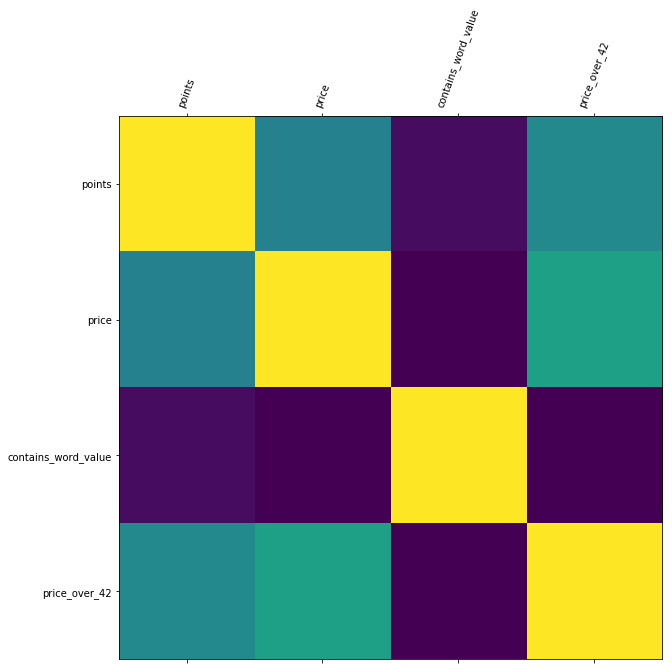

In [66]:
plot_corr(wines)

Notes:
- Looks like the price doesn't have a strong correlation with the "points." May seem unintuitive at first, but I think is reasonable given what I know about wine, which is that a lot of times the "rating" and the price point can be a bit arbitrary.
- Price does seem correlated with whether or not the description contains the word "value," confirming my hypothesis from earlier.
- Price naturally is a bit correlated with whether or not the price is over 42 dollars. However, since so many of the wines are well over 42 dollars, the cut-off of 42 doesn't capture the correlation as well.

Ok, let's move on to modeling.

## Modeling from Description 

Q2: Build a model to predict the price of a bottle of wine using only the text in the 'description' column.

Just so we know, let's quickly visualize the price distribution so we can look for outliers.

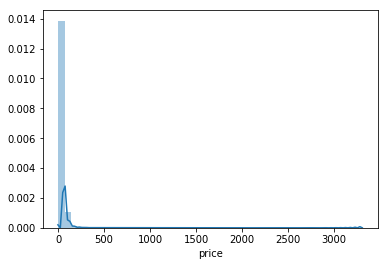

In [53]:
sns.distplot(wines['price'].dropna(inplace=False))

(0, 100)

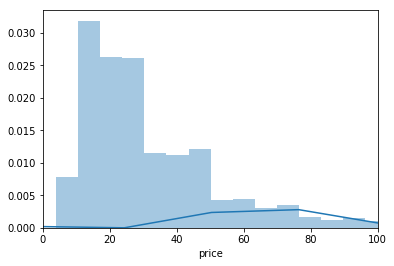

In [59]:
sns.distplot(wines['price'].dropna(inplace=False), bins=500)
plt.xlim(0,100)

#### Prepare data

In [15]:
wines_desc = wines[['price', 'description']].dropna(inplace=False)

In [16]:
wines_desc = wines_desc.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

In [19]:
wines_desc.head()

,price,description
1,15.0,"This is ripe and fruity, a wine that is smooth..."
2,14.0,"Tart and snappy, the flavors of lime flesh and..."
3,13.0,"Pineapple rind, lemon pith and orange blossom ..."
4,65.0,"Much like the regular bottling from 2012, this..."
5,15.0,Blackberry and raspberry aromas show a typical...


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = wines_desc['description']

In [19]:
y = wines_desc['price']

Since most of the descriptions are about the same length, we can use a simple count vectorizer. (TdIdf vectorizer would be more useful if the descriptions are of different lengths. Hashing vectorizer wouldn't allow use to compute the inverse transform from feature indices to string feature names.)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
count_vect = CountVectorizer(stop_words='english', analyzer='word')

Note: Given more time, we can tokenize our words first.

In [22]:
X_counts = count_vect.fit_transform(X)

In [23]:
X_counts.shape

(120975, 29967)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.33, random_state=42)

### Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.externals import joblib

In [26]:
log_reg = LogisticRegression()

In [27]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
joblib.dump(log_reg, 'logistic_regression.pkl')

['logistic_regression.pkl']

In [32]:
log_reg_y_pred = log_reg.predict(X_test)

In [23]:
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error, mean_squared_error, r2_score

In [24]:
def score_regression(y_pred, y_test=y_test):
    print('Mean absolute error: ')
    print(mean_absolute_error(y_test, y_pred))
    
    print('Median absolute error: ')
    print(median_absolute_error(y_test, y_pred))
    
    print('Root mean squared error: ')
    print(np.sqrt(mean_squared_error(y_test, y_pred)))
    
    print('r2 score: ')
    print(r2_score(y_test, y_pred))

In [62]:
score_regression(log_reg_y_pred)

Mean absolute error: 
15.0354942137
Median absolute error: 
7.0
Root mean squared error: 
35.7895573486
r2 score: 
0.133636890331


So... not great. But not as awful when considering that the standard deviation of price is about 41 dollars. Remember that we have that outlier French wine at 3300 dollars. When I look at the median absolute error, it's definitely less, likely due to the outliers.

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf_reg = RandomForestRegressor()

In [63]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [64]:
joblib.dump(rf_reg, 'random_forest_regression.pkl')

['random_forest_regression.pkl']

In [65]:
rf_y_pred = rf_reg.predict(X_test)

In [67]:
score_regression(rf_y_pred)

Mean absolute error: 
15.028302732
Median absolute error: 
7.9
Root mean squared error: 
36.3866934184
r2 score: 
0.104485792062


Not significantly better or worse.

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
gb_reg = GradientBoostingRegressor()

In [71]:
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [72]:
joblib.dump(gb_reg, 'gradient_boosting_regression.pkl')

['gradient_boosting_regression.pkl']

In [74]:
gb_y_pred = gb_reg.predict(X_test.toarray())

In [75]:
score_regression(gb_y_pred)

Mean absolute error: 
17.4237326213
Median absolute error: 
12.8720900322
Root mean squared error: 
35.5121429824
r2 score: 
0.147015658608


We might also be interest in comparing test data metrics with train data metrics, to see if the root mean squared error (RMSE) is significantly different.

In [77]:
rf_y_train_pred = rf_reg.predict(X_train)

In [81]:
score_regression(rf_y_train_pred, y_test=y_train)

Mean absolute error: 
5.88553257334
Median absolute error: 
2.8
Root mean squared error: 
15.4093221145
r2 score: 
0.866859434711


It looks like the models could probably be tuned more to better fit the training data.

Note: Given more time, we could add gridsearch to the regression models to find the best parameters, and cross-validation for more robust metric assessment. We could also try other vectorizers, such as the hashing vectorizer or tfidf, for comparison.

### Classification

Classification: Predict whether a wine costs more than 42 dollars only using the “description column”.

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report

In [26]:
# Plot AUC curve
def plot_auc(y_pred, label='AUC: '):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label=label + auc)

In [26]:
def score_classifier(y_pred):
    print('Accuracy: ')
    print(accuracy_score(y_test, y_pred))
    
    print('\nAUC Score: ')
    print(roc_auc_score(y_test, y_pred))
    
    print('\nClassification report: ')
    print(classification_report(y_test, y_pred))
    

For the sake of time, we'll just use 3 techniques, in order of complexity. 

In [27]:
y_clf = np.where(y > 42, 1, 0)

In [28]:
sum(y_clf)

29703

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, y_clf, test_size=0.33, random_state=42)

In [166]:
from sklearn.naive_bayes import GaussianNB

In [167]:
nb_clf = GaussianNB()

In [168]:
nb_clf.fit(X_train.toarray(), y_train)

GaussianNB(priors=None)

In [169]:
joblib.dump(nb_clf, 'naive_bayes_classifier.pkl')

['naive_bayes_classifier.pkl']

In [32]:
nb_clf = joblib.load('naive_bayes_classifier.pkl')

In [33]:
nb_y_pred = nb_clf.predict(X_test.toarray())

In [34]:
score_classifier(nb_y_pred)

Accuracy: 
0.373102549972

AUC Score: 
0.550811625686

Classification report: 
             precision    recall  f1-score   support

          0       0.86      0.20      0.33     30205
          1       0.27      0.90      0.41      9717

avg / total       0.72      0.37      0.35     39922



Honestly... pretty bad performance.

Note: 
- Precision: true positive / (true positive + false positive). Ability to not label a negative sample as positive. aka you want to feel good about predicted positives.
- Recall: true positive / (true positive + false negative). Ability to find all positive samples. 
- F1 score: weighted average of precision and recall.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_clf = RandomForestClassifier()

In [55]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [56]:
joblib.dump(rf_clf, 'random_forest_classifier.pkl')

['random_forest_classifier.pkl']

In [57]:
rf_y_pred = rf_clf.predict(X_test)

In [58]:
score_classifier(rf_y_pred)

Accuracy: 
0.79968438455

AUC Score: 
0.610947092913

Classification report: 
             precision    recall  f1-score   support

          0       0.80      0.98      0.88     30205
          1       0.79      0.24      0.37      9717

avg / total       0.80      0.80      0.76     39922



Definitely better! But not amazing. AUC of 61% is ... okay. Useable.

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
nn_clf = MLPClassifier()

In [33]:
nn_clf.fit(X_train, y_train)

/Users/nancywong/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:565: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [34]:
joblib.dump(nn_clf, 'multilayer_perceptron_classifier.pkl')

['multilayer_perceptron_classifier.pkl']

In [35]:
nn_y_pred = nn_clf.predict(X_test)

In [36]:
score_classifier(nn_y_pred)

Accuracy: 
0.835654526326

AUC Score: 
0.751467389565

Classification report: 
             precision    recall  f1-score   support

          0       0.87      0.92      0.89     30205
          1       0.69      0.59      0.64      9717

avg / total       0.83      0.84      0.83     39922



I actually interrupted the kernel because this was taking a while, but really the problem might just be my computer... Anyway we get pretty good accuracy and AUC, most promising so far. More training for the neural network likely would get us even better results! May come back and retrain if I have time.

## Modeling without Description

### Prepare data

In [51]:
wines_nodesc = wines.dropna(inplace=False)

In [52]:
wines_nodesc = wines_nodesc.drop(['description'], axis=1, inplace=False)

In [53]:
wines_nodesc.head()

,country,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,contains_word_value,price_over_42,year
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,False,1,2012
10,US,Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,True,0,2011
23,US,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi,False,0,2011
25,US,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa,False,1,2011
35,US,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath,False,1,2010


#### Categorical Encoding

In [54]:
wines_nodesc.dtypes

country                category
designation            category
points                    int64
price                   float64
province               category
region_1               category
region_2               category
taster_name            category
title                    object
variety                category
winery                 category
contains_word_value        bool
price_over_42             int64
year                     object
dtype: object

In [60]:
wines_nodesc['year'] = wines_nodesc['year'].astype('int')

In [61]:
print(categorical_cols)

['country', 'designation', 'province', 'region_1', 'region_2', 'taster_name', 'variety', 'winery']


In [62]:
from sklearn.preprocessing import LabelEncoder

In [63]:
label_encoder_map = {}

In [65]:
for category in categorical_cols:
    le = LabelEncoder()
    le.fit(wines_nodesc[category])
    
    # Add to our dictionary so we can inverse transform if needed
    label_encoder_map[category] = le
    
    # Encode categories
    wines_nodesc[category] = le.transform(wines_nodesc[category])

In [66]:
wines_nodesc.head()

,country,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery,contains_word_value,price_over_42,year
4,0,9267,87,65.0,2,165,16,6,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,119,2396,False,1,2012
10,0,5536,87,19.0,0,82,6,10,Kirkland Signature 2011 Mountain Cuvée Caberne...,21,1361,True,0,2011
23,0,7655,87,22.0,0,94,1,4,Bianchi 2011 Signature Selection Merlot (Paso ...,81,279,False,0,2011
25,0,4352,87,69.0,0,133,12,10,Castello di Amorosa 2011 King Ridge Vineyard P...,119,465,False,1,2011
35,0,3967,86,50.0,2,67,16,6,Erath 2010 Hyland Pinot Noir (McMinnville),119,856,False,1,2010


## Regression

In [67]:
y = wines_nodesc['price']

In [76]:
X = wines_nodesc.drop(['price', 'price_over_42','title'], axis=1, inplace=False)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.externals import joblib

In [80]:
log_reg = LogisticRegression()

In [81]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
joblib.dump(log_reg, 'logistic_regression_nodesc.pkl')

['logistic_regression_nodesc.pkl']

In [83]:
log_reg_y_pred = log_reg.predict(X_test)

In [84]:
score_regression(log_reg_y_pred, y_test=y_test)

Mean absolute error: 
15.8502050231
Median absolute error: 
10.0
Root mean squared error: 
45.8483798672
r2 score: 
-2.39644083147


In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
rf_reg = RandomForestRegressor()

In [96]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [97]:
joblib.dump(rf_reg, 'random_forest_regression_nodesc.pkl')

['random_forest_regression_nodesc.pkl']

In [98]:
rf_y_pred = rf_reg.predict(X_test)

In [99]:
score_regression(rf_y_pred, y_test=y_test)

Mean absolute error: 
10.096326243
Median absolute error: 
6.4
Root mean squared error: 
17.7781188198
r2 score: 
0.489321381595


In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
gb_reg = GradientBoostingRegressor()

In [102]:
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [103]:
joblib.dump(gb_reg, 'gradient_boosting_regression_nodesc.pkl')

['gradient_boosting_regression_nodesc.pkl']

In [104]:
gb_y_pred = gb_reg.predict(X_test)

In [105]:
score_regression(gb_y_pred, y_test=y_test)

Mean absolute error: 
11.4060635317
Median absolute error: 
8.36202552835
Root mean squared error: 
17.2687702707
r2 score: 
0.51816439378


We might also be interest in comparing test data metrics with train data metrics, to see if the root mean squared error (RMSE) is significantly different.

In [106]:
rf_y_train_pred = rf_reg.predict(X_train)

In [107]:
score_regression(rf_y_train_pred, y_test=y_train)

Mean absolute error: 
4.16418475974
Median absolute error: 
2.2
Root mean squared error: 
12.0681696879
r2 score: 
0.845916827115


Definitely better performance than the description-only regression models! Trained and made predictions much faster, as well. Random forest regression performs the best, followed by the gradient boosted regression.

As mentioned above, cross-validation would make these metrics more robust.

## Classification

In [131]:
y = wines_nodesc['price_over_42']

In [132]:
X = wines_nodesc.drop(['price', 'price_over_42', 'title'], axis=1, inplace=False)

In [133]:
X.head()

,country,designation,points,province,region_1,region_2,taster_name,variety,winery,contains_word_value,year
4,0,9267,87,2,165,16,6,119,2396,False,2012
10,0,5536,87,0,82,6,10,21,1361,True,2011
23,0,7655,87,0,94,1,4,81,279,False,2011
25,0,4352,87,0,133,12,10,119,465,False,2011
35,0,3967,86,2,67,16,6,119,856,False,2010


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
nb_clf = GaussianNB()

In [137]:
nb_clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [138]:
joblib.dump(nb_clf, 'naive_bayes_classifier_nodesc.pkl')

['naive_bayes_classifier_nodesc.pkl']

In [139]:
nb_y_pred = nb_clf.predict(X_test)

In [140]:
score_classifier(nb_y_pred)

Accuracy: 
0.735904664275

AUC Score: 
0.722132508421

Classification report: 
             precision    recall  f1-score   support

          0       0.80      0.77      0.79      4968
          1       0.63      0.67      0.65      2836

avg / total       0.74      0.74      0.74      7804



Pretty decent accuracy and AUC.

Note: 
- Precision: true positive / (true positive + false positive). Ability to not label a negative sample as positive. aka you want to feel good about predicted positives.
- Recall: true positive / (true positive + false negative). Ability to find all positive samples. 
- F1 score: weighted average of precision and recall.

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf_clf = RandomForestClassifier()

In [143]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [144]:
joblib.dump(rf_clf, 'random_forest_classifier_nodesc.pkl')

['random_forest_classifier_nodesc.pkl']

In [145]:
rf_y_pred = rf_clf.predict(X_test)

In [146]:
score_classifier(rf_y_pred)

Accuracy: 
0.833034341363

AUC Score: 
0.809315869804

Classification report: 
             precision    recall  f1-score   support

          0       0.85      0.90      0.87      4968
          1       0.80      0.72      0.76      2836

avg / total       0.83      0.83      0.83      7804



Even better accuracy and AUC.

In [147]:
from sklearn.neural_network import MLPClassifier

In [148]:
nn_clf = MLPClassifier()

In [149]:
nn_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [150]:
joblib.dump(nn_clf, 'multilayer_perceptron_classifier_nodesc.pkl')

['multilayer_perceptron_classifier_nodesc.pkl']

In [151]:
nn_y_pred = nn_clf.predict(X_test)

In [152]:
score_classifier(nn_y_pred)

Accuracy: 
0.648641722194

AUC Score: 
0.532688330846

Classification report: 
             precision    recall  f1-score   support

          0       0.65      0.96      0.78      4968
          1       0.59      0.11      0.18      2836

avg / total       0.63      0.65      0.56      7804



Interestingly, worse accuracy and AUC. 

# Summary

The regression methods we used are: logistic regression, random forest regression, and gradient boosting regression.

The classification methods we used are: naive bayes, random forest, and multi-layer perceptron (neural network).

Overall, the results are:

For regression:
- The regression methods that used non-description fields performed much better than the description-only regression methods. 
- The description-only regression methods didn't differ too greatly in performance.
- Of the non-description regression methods, logistic regression performed the worst, yielding a negative r2 score. :( 
- The best regression method of those tried is the description-only random forest regression, with a mean absolute error of 10.1, median absolute error of 6.4, root mean squared error of 17.8, and moderate r2 score of 0.49. For comparison, the standard deviation of the actual prices is about 41 dollars.

For classification:
- Overall, the classification methods for non-description fields performed a bit better than the description-only regression methods. 
- For the description-only classifiers, naive bayes performed pretty poorly, with low accuracy (37.3%) and AUC (55.1%). Random forest performed a bit better, with an 80% accuray and 61.1% AUC score. 
- The description-only multi-layer perceptron performed surprisingly pretty well, with an accuracy of 83.6% and AUC of 75.1% -- but perhaps this is not as surprising because neural networks tend to handle unstructured data a bit better than the other two methods.
- The non-description classification methods had the best performance overall out of the methods tried in this analysis. Naive bayes had decent accuracy (73.6%) and AUC (72.2%). Random forest also had pretty good accuracy (83.3%) and AUC (80.9%), outperforming the description-only neural network. 
- The non-description multi-layer perceptron did not perform as well, with accuracy of 64.9% and AUC of 53.3%.

Out of all the methods tried, the non-description random forest classifier appears to have the best performance.

It's also worth noting that all of these methods were used out-of-the-box, with no parameter tuning. With grid search, it's possible we would yield even better performance.

## Discussion

Based on the models and methods used in this analysis, it appears that the description provides less predictive information than the non-description fields, such as where it's from, etc. This is considering that, generally speaking, the models using non-description fields performed better than the description-field-only models.

However, we should consider that we didn't perform a lot of NLP or text pre-processing; we only tried one method for encoding the free-form text for modeling. For a more robust analysis, we could try tokenizing or stemming before vectorizing. We could also try other vectorizers like a hash vectorizer or tfidf vectorizer and compare performance. We also limited the number of models we used for the sake of time.

Given more time and/or computing power, we could use cross-validation for more robust metrics, as well as try out other models for regression and classification.


Furthermore, also given more time, we can open up these models and either graph the feature importances for the model, or perform feature selection. This can give us better insights toward which non-description features specifically were useful, and whether or not they could have been captured in the text description.